In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("mutual_corr.csv")
df_month

,March_3,March,November_2,January_3,August_4,November_4,May_6,September_4,September_3,January_6,...,April_12,April_11,September,July_2,October_4,August_5,November_5,March_4,July_4,April_2
0,0.014885,-0.336650,0.478814,-0.046796,-0.087428,-0.136173,-0.264519,0.096451,-0.349780,-0.286046,...,0.355962,-0.426614,-0.073705,-0.299483,0.318039,0.113122,-0.529329,0.097284,1.051453,0.117166
1,-0.009168,-0.359282,0.478814,0.376407,-0.087428,-0.136173,-0.858258,0.096451,-0.349780,-0.638762,...,-0.058088,-1.072689,-0.073705,-0.299483,0.318039,0.113122,-0.529329,0.275661,1.051453,0.186562
2,0.113465,-0.540676,0.609518,-0.177302,-0.059203,0.108331,-0.420201,0.165471,-0.300839,-0.254996,...,0.213551,-1.201168,0.028451,-0.086938,0.583704,0.141060,-0.328002,0.100446,0.772835,-0.034172
3,-0.517431,-0.498272,0.651053,0.154934,-0.051693,-0.122380,-0.371818,0.495736,0.114060,-0.614118,...,0.034262,-1.561622,0.131039,0.220758,0.483213,-0.150963,-0.288175,0.867563,0.576244,-0.014895
4,-0.356117,-0.480834,1.195737,0.334612,0.404268,-0.611427,0.097631,0.159719,-0.619770,-0.737237,...,0.580482,-1.113790,0.052057,-0.323448,0.688692,-0.096694,-0.248737,0.416068,0.518171,-0.064567
5,-0.357794,0.072213,0.129159,0.137515,0.448407,-0.277523,-0.013927,0.375562,-0.075759,-0.465601,...,-0.310424,-0.985383,-0.012335,-0.316019,0.649442,-0.007628,-0.429069,0.137918,0.344625,0.280417
6,-0.021923,-0.236433,0.309408,-0.403897,0.021571,-0.628275,0.171641,0.431474,-0.395933,-0.381131,...,0.026925,-0.811863,0.244449,-0.024309,0.811653,0.002625,-0.349428,0.135571,0.574644,0.338692
7,-0.213950,-0.597791,0.140510,0.144941,0.443615,-0.114973,-0.410507,0.019982,-0.432429,-0.454070,...,-0.368904,-0.746819,0.142881,-0.147588,0.625348,0.081486,0.034377,-0.152440,0.610627,0.567676
8,-0.846435,-0.287527,0.138254,-0.126336,-0.076138,0.293501,0.267087,0.003852,-0.836277,-0.313084,...,0.000931,-0.525575,0.278069,-0.578523,0.596694,-0.307018,-0.225438,0.226547,0.650884,0.531194
9,-0.532404,-0.252568,-0.311381,-0.422571,-0.006048,-0.018843,-0.345718,0.275820,-0.293009,-0.632383,...,-0.473223,-0.671537,0.075519,-0.092522,0.747794,-0.194896,-0.305683,-0.311936,0.964142,0.423871


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :10]
x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.74022016, -0.52338235,  0.34578166,  0.37664201, -0.89669596,
        -0.2529537 ,  0.13702263, -0.9026956 , -0.72875786,  1.026506  ],
       [ 0.64393458, -0.64570411,  0.34578166,  2.11301158, -0.89669596,
        -0.2529537 , -1.51679265, -0.9026956 , -0.72875786, -0.77013951],
       [ 1.13484488, -1.62608255,  0.67081796, -0.15881652, -0.78883745,
         0.71256455, -0.2966165 , -0.54563413, -0.58350515,  1.18466924],
       [-1.39068898, -1.3969013 ,  0.77410672,  1.20432571, -0.76013654,
        -0.19848533, -0.16185069,  1.16292511,  0.64787316, -0.64461173],
       [-0.74493435, -1.30265251,  2.12863387,  1.94152934,  0.98227758,
        -2.12967502,  1.14576555, -0.57539301, -1.53006063, -1.27174954],
       [-0.75164629,  1.68639892, -0.52374418,  1.13285386,  1.15094882,
        -0.81112901,  0.83502894,  0.54123022,  0.08450964,  0.11189897],
       [ 0.59287591,  0.01826215, -0.07549938, -1.08851678, -0.48016656,
        -2.19620771,  1.35191507,  0.83047828

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [8]:
x_test = df_month.iloc[43:, :10]
x_test = scaler.fit_transform(x_test)
x_test

array([[ 0.46019097,  0.76518399, -1.19495543, -0.67912407,  2.37792699,
        -0.05137416, -0.11770053,  0.20141963, -0.03146663,  1.46879567],
       [-0.69406097,  0.59306736,  0.70576748,  1.03246434,  0.54444572,
        -0.10836174, -2.24320799, -1.431578  ,  1.06501128,  0.8383811 ],
       [ 0.97284989, -0.29704056, -0.69038146,  0.9356416 ,  0.02605507,
         0.20446034,  0.46351314,  1.10365389,  0.80244605, -0.85727703],
       [-0.53742645,  0.453894  , -0.63367476,  1.83956438,  1.26092271,
         1.90198944,  0.47816946, -0.35963525,  0.14081179,  0.73514642],
       [ 0.19994926, -0.29544147, -0.6557819 , -0.16315533,  0.90931263,
         0.19381147, -1.06915212,  1.29102177,  0.69227142, -0.72395001],
       [-1.56519321,  2.13787994, -0.4645728 , -1.97436685, -0.98253358,
        -1.7714059 , -0.51588634, -0.98151818, -1.73184018,  1.36211187],
       [ 0.19178092, -0.25754225, -1.42489249,  0.15226225, -0.31246118,
         0.28928596,  0.84995527,  0.49055495

In [9]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] 
    y_test.append(y_ts)

In [10]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 3}
Best Score: 0.1338281277657828
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 23}
Best Score: 0.07448438267451596
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 10}
Best Score: 0.14065996071650866
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 16}
Best Score: 0.09187629751967541
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 5}
Best Score: 0.2515595461153905


In [13]:
y_pred_list

[array([ 0.28128704, -0.31505556, -0.06831019,  1.00604167, -0.24313342,
         0.08156481,  0.37877315, -0.42593434, -0.37784722,  0.08156481,
        -0.30368056, -0.37784722,  0.37877315, -0.06083333,  0.80631944,
        -1.20722222]),
 array([-0.09170436, -0.151371  , -0.14215913,  0.28823575, -0.06835536,
        -0.01790059,  0.0185377 , -0.1771904 , -0.18316898, -0.12814266,
        -0.19120687, -0.01819004,  0.0050383 ,  0.00346683,  0.29215294,
        -0.48193537]),
 array([-0.2195627 , -0.1978193 , -0.24042857,  1.03574405, -0.14514603,
         0.21099762, -0.0416619 , -0.1728812 , -0.0429693 , -0.34449524,
        -0.27413596, -0.2365693 , -0.20642857,  0.0241631 ,  1.03574405,
        -0.68978596]),
 array([ 0.02305337, -0.04696854, -0.11968787,  0.93879959, -0.22396462,
         0.19704516,  0.13409971, -0.18866806,  0.09285254, -0.13739617,
        -0.2171805 , -0.05254089,  0.07360382,  0.38894449,  0.7582701 ,
        -0.75218987]),
 array([-0.01314881, -0.07986508

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.2785987989336796,
 0.39019325784553077,
 0.6497268026518495,
 0.609017513051183,
 0.4340535453928504]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/10 predictors/kendall/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'hgt+vwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/10 predictors/kendall/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/10 predictors/kendall/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'hgt+vwind Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/10 predictors/kendall/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:

y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 3}
Best Score: 0.1338281277657828
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 23}
Best Score: 0.07448438267451596
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 10}
Best Score: 0.14065996071650866
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 16}
Best Score: 0.09187629751967541
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 5}
Best Score: 0.2515595461153905


In [21]:
y_pred_list_rf

[array([ 0.28128704, -0.31505556, -0.06831019,  1.00604167, -0.24313342,
         0.08156481,  0.37877315, -0.42593434, -0.37784722,  0.08156481,
        -0.30368056, -0.37784722,  0.37877315, -0.06083333,  0.80631944,
        -1.20722222]),
 array([-0.09170436, -0.151371  , -0.14215913,  0.28823575, -0.06835536,
        -0.01790059,  0.0185377 , -0.1771904 , -0.18316898, -0.12814266,
        -0.19120687, -0.01819004,  0.0050383 ,  0.00346683,  0.29215294,
        -0.48193537]),
 array([-0.2195627 , -0.1978193 , -0.24042857,  1.03574405, -0.14514603,
         0.21099762, -0.0416619 , -0.1728812 , -0.0429693 , -0.34449524,
        -0.27413596, -0.2365693 , -0.20642857,  0.0241631 ,  1.03574405,
        -0.68978596]),
 array([ 0.02305337, -0.04696854, -0.11968787,  0.93879959, -0.22396462,
         0.19704516,  0.13409971, -0.18866806,  0.09285254, -0.13739617,
        -0.2171805 , -0.05254089,  0.07360382,  0.38894449,  0.7582701 ,
        -0.75218987]),
 array([-0.01314881, -0.07986508

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.2785987989336796,
 0.39019325784553077,
 0.6497268026518495,
 0.609017513051183,
 0.4340535453928504]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/10 predictors/kendall/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'hgt+vwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook
    
print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/10 predictors/kendall/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/10 predictors/kendall/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'hgt+vwind Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/10 predictors/kendall/comparison plots/randomforest


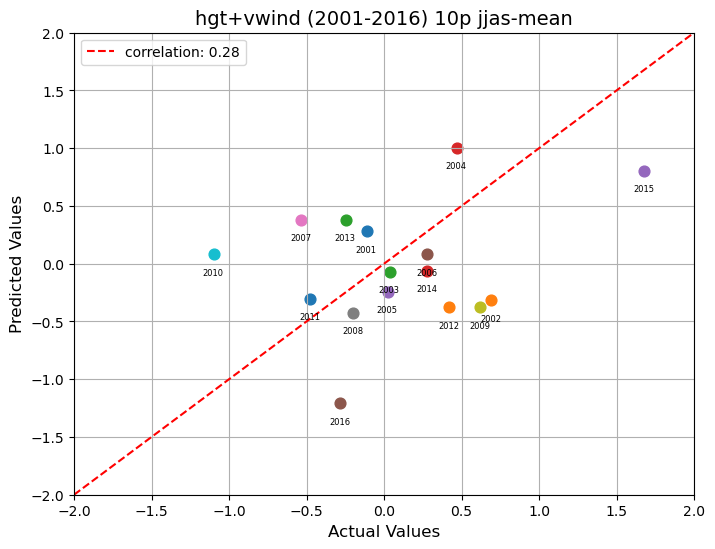

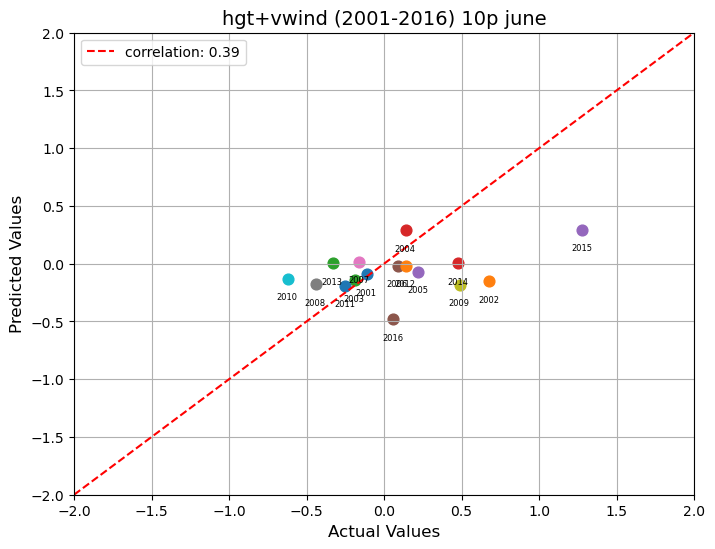

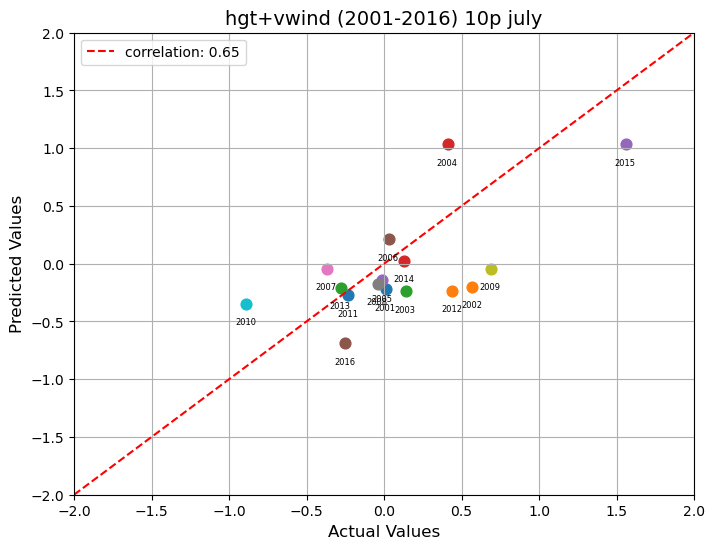

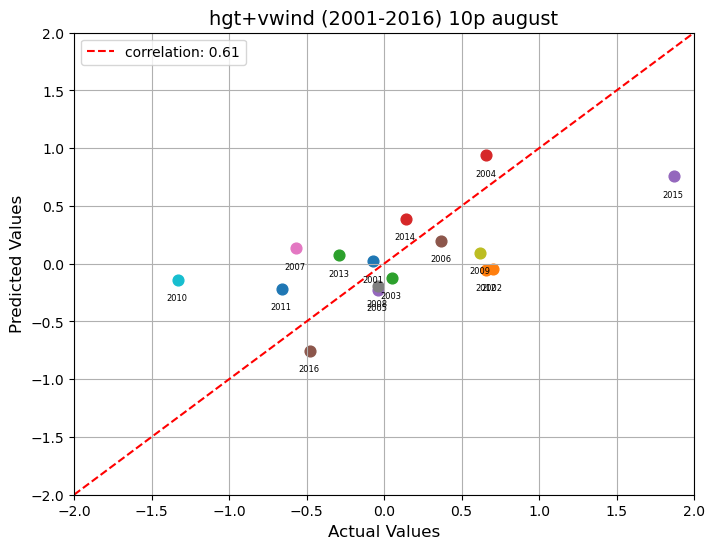

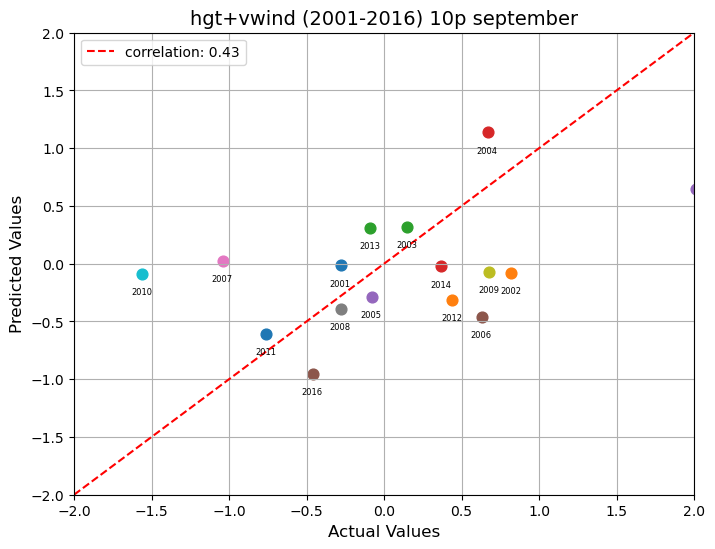

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=60)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'hgt+vwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.show